In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors,cm
import cartopy.feature as cfeature
from datetime import timedelta
from matplotlib.animation import FuncAnimation
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from scalebar import scale_bar


In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

Plot consecitive displacement between a pair of particles

In [3]:
home_folder = "/nethome/manra003/analysis/dispersion/"
min_lat, max_lat = -35, -15
min_lon, max_lon = 10, 20
type1, type2= "DVM", "2D"
year= 2017
month_index=5
threshold_dist=100
t_days =100

dist= np.load(home_folder + "outputs/Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(type1, type2, year, threshold_dist))
ds1=xr.open_zarr(home_folder+'simulations/{0}/{1}/Benguela_{0}_1ov32_641x_321yres_{1}-{2}_5z_100days.zarr'.format(type1, year, str(month_index+1).zfill(2)))
ds2=xr.open_zarr(home_folder+'simulations/{0}/{1}/Benguela_{0}_1ov32_641x_321yres_{1}-{2}_5z_100days.zarr'.format(type2, year, str(month_index+1).zfill(2)))

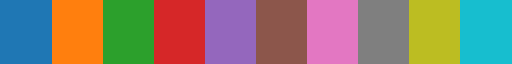

In [16]:
cmap = plt.get_cmap('tab10')
new_cmap = colors.ListedColormap(cmap(np.arange(10)))
new_cmap
# colors2=[new_cmap(1),new_cmap(3),new_cmap(4)]
colors2=[new_cmap(3),new_cmap(2),new_cmap(4)]

markers2=['^','P','d']
new_cmap

random position: 40756


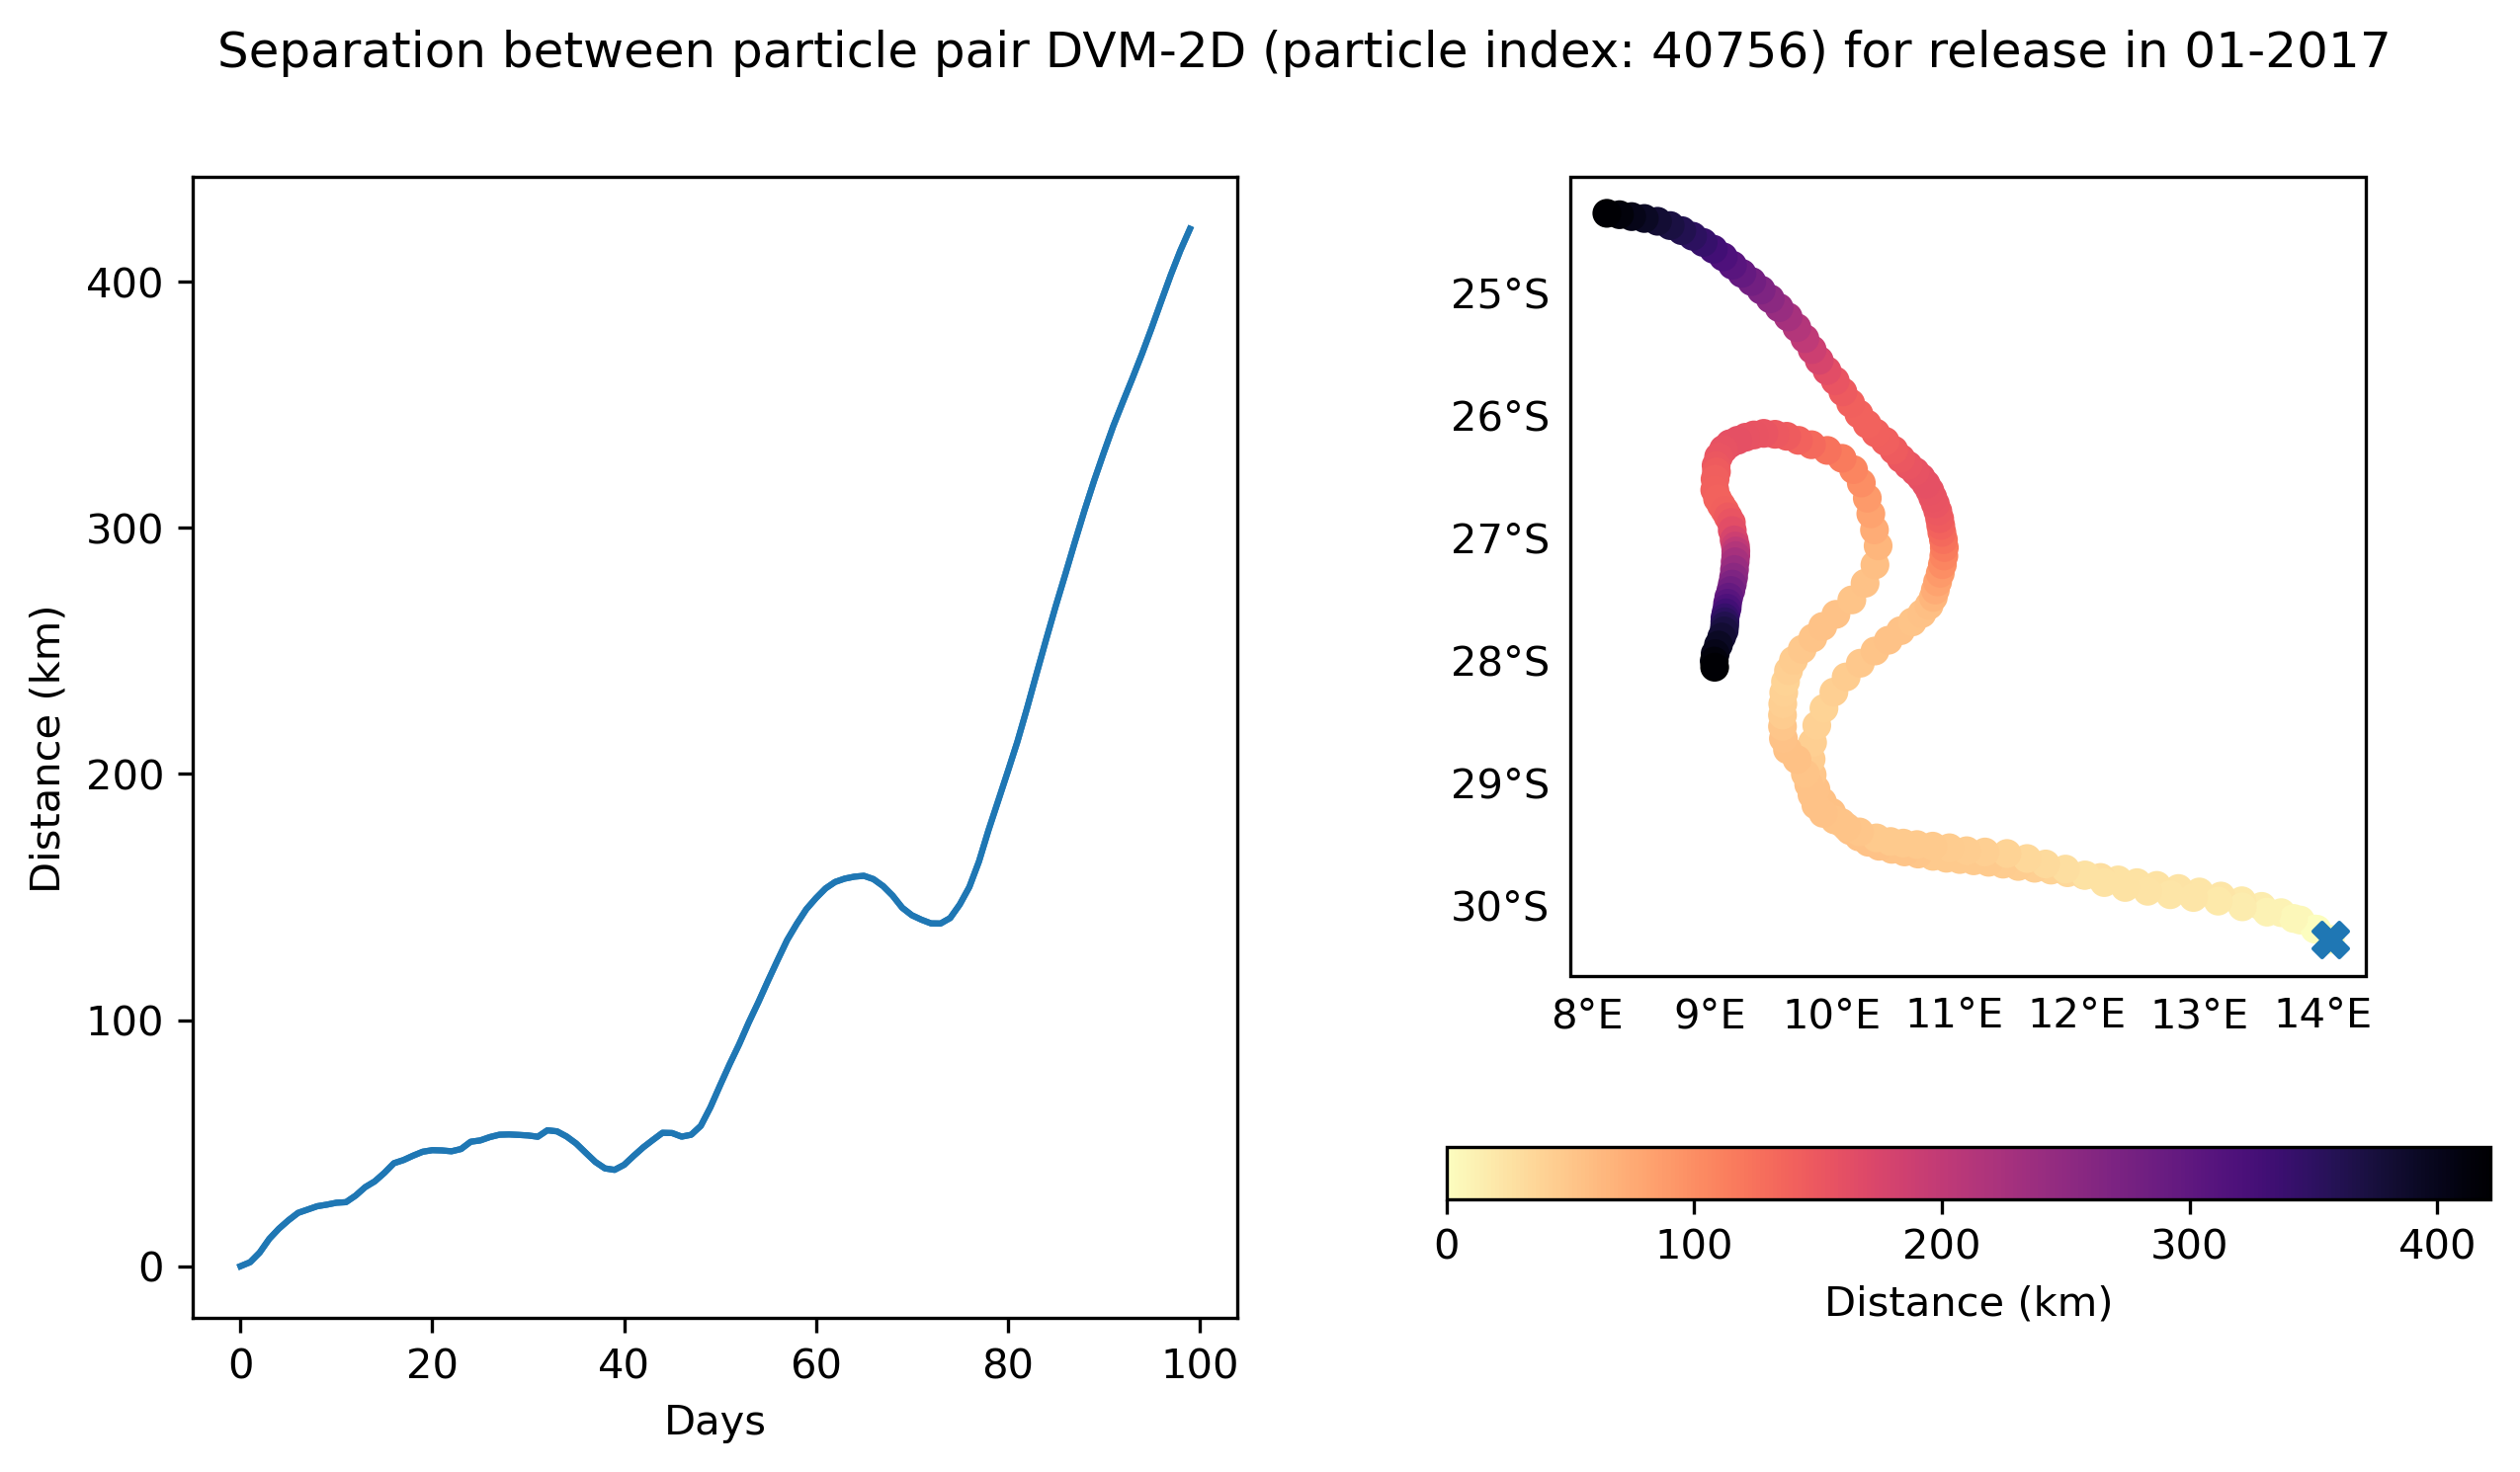

In [26]:
# position=np.random.randint(0,104637)
# print("random position:", position)
# dpi=100
# custom_size=10

# fig = plt.figure(figsize=(10,5), dpi=dpi)
# fig.suptitle("Separation between particle pair {0}-{1} (particle index: {2}) for release in {3}-{4}".format(type1,type2,position,str(month_index+1).zfill(2),year))

# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(dist[position,:,month_index], label= month_index+1, color=new_cmap(0))
# ax1.plot(dist[position,:,month_index], label= month_index+1, color=new_cmap(0))

# ax1.set_ylabel("Distance (km)")
# ax1.set_xlabel("Days")

# ax2=fig.add_subplot(122, projection=ccrs.PlateCarree())
# colormap = colors.ListedColormap(['gainsboro', 'white'])
# gl = ax2.gridlines(draw_labels=True)
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlines = False
# gl.ylines = False
# gl.top_labels = False
# gl.right_labels = False
# # ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
# distance=dist[position,:,month_index]
# im=ax2.scatter(ds1.lon[position,:100],ds1.lat[position,:100], c=distance, cmap='magma_r')
# ax2.scatter(ds2.lon[position,:100],ds2.lat[position,:100], c=distance, cmap='magma_r')
# ax2.scatter(ds1.lon[position,0],ds1.lat[position,0], marker='X',s=70)
# cbar=fig.colorbar(im, ax=ax2, label='Distance (km)', orientation= 'horizontal')

# #10782, 36844

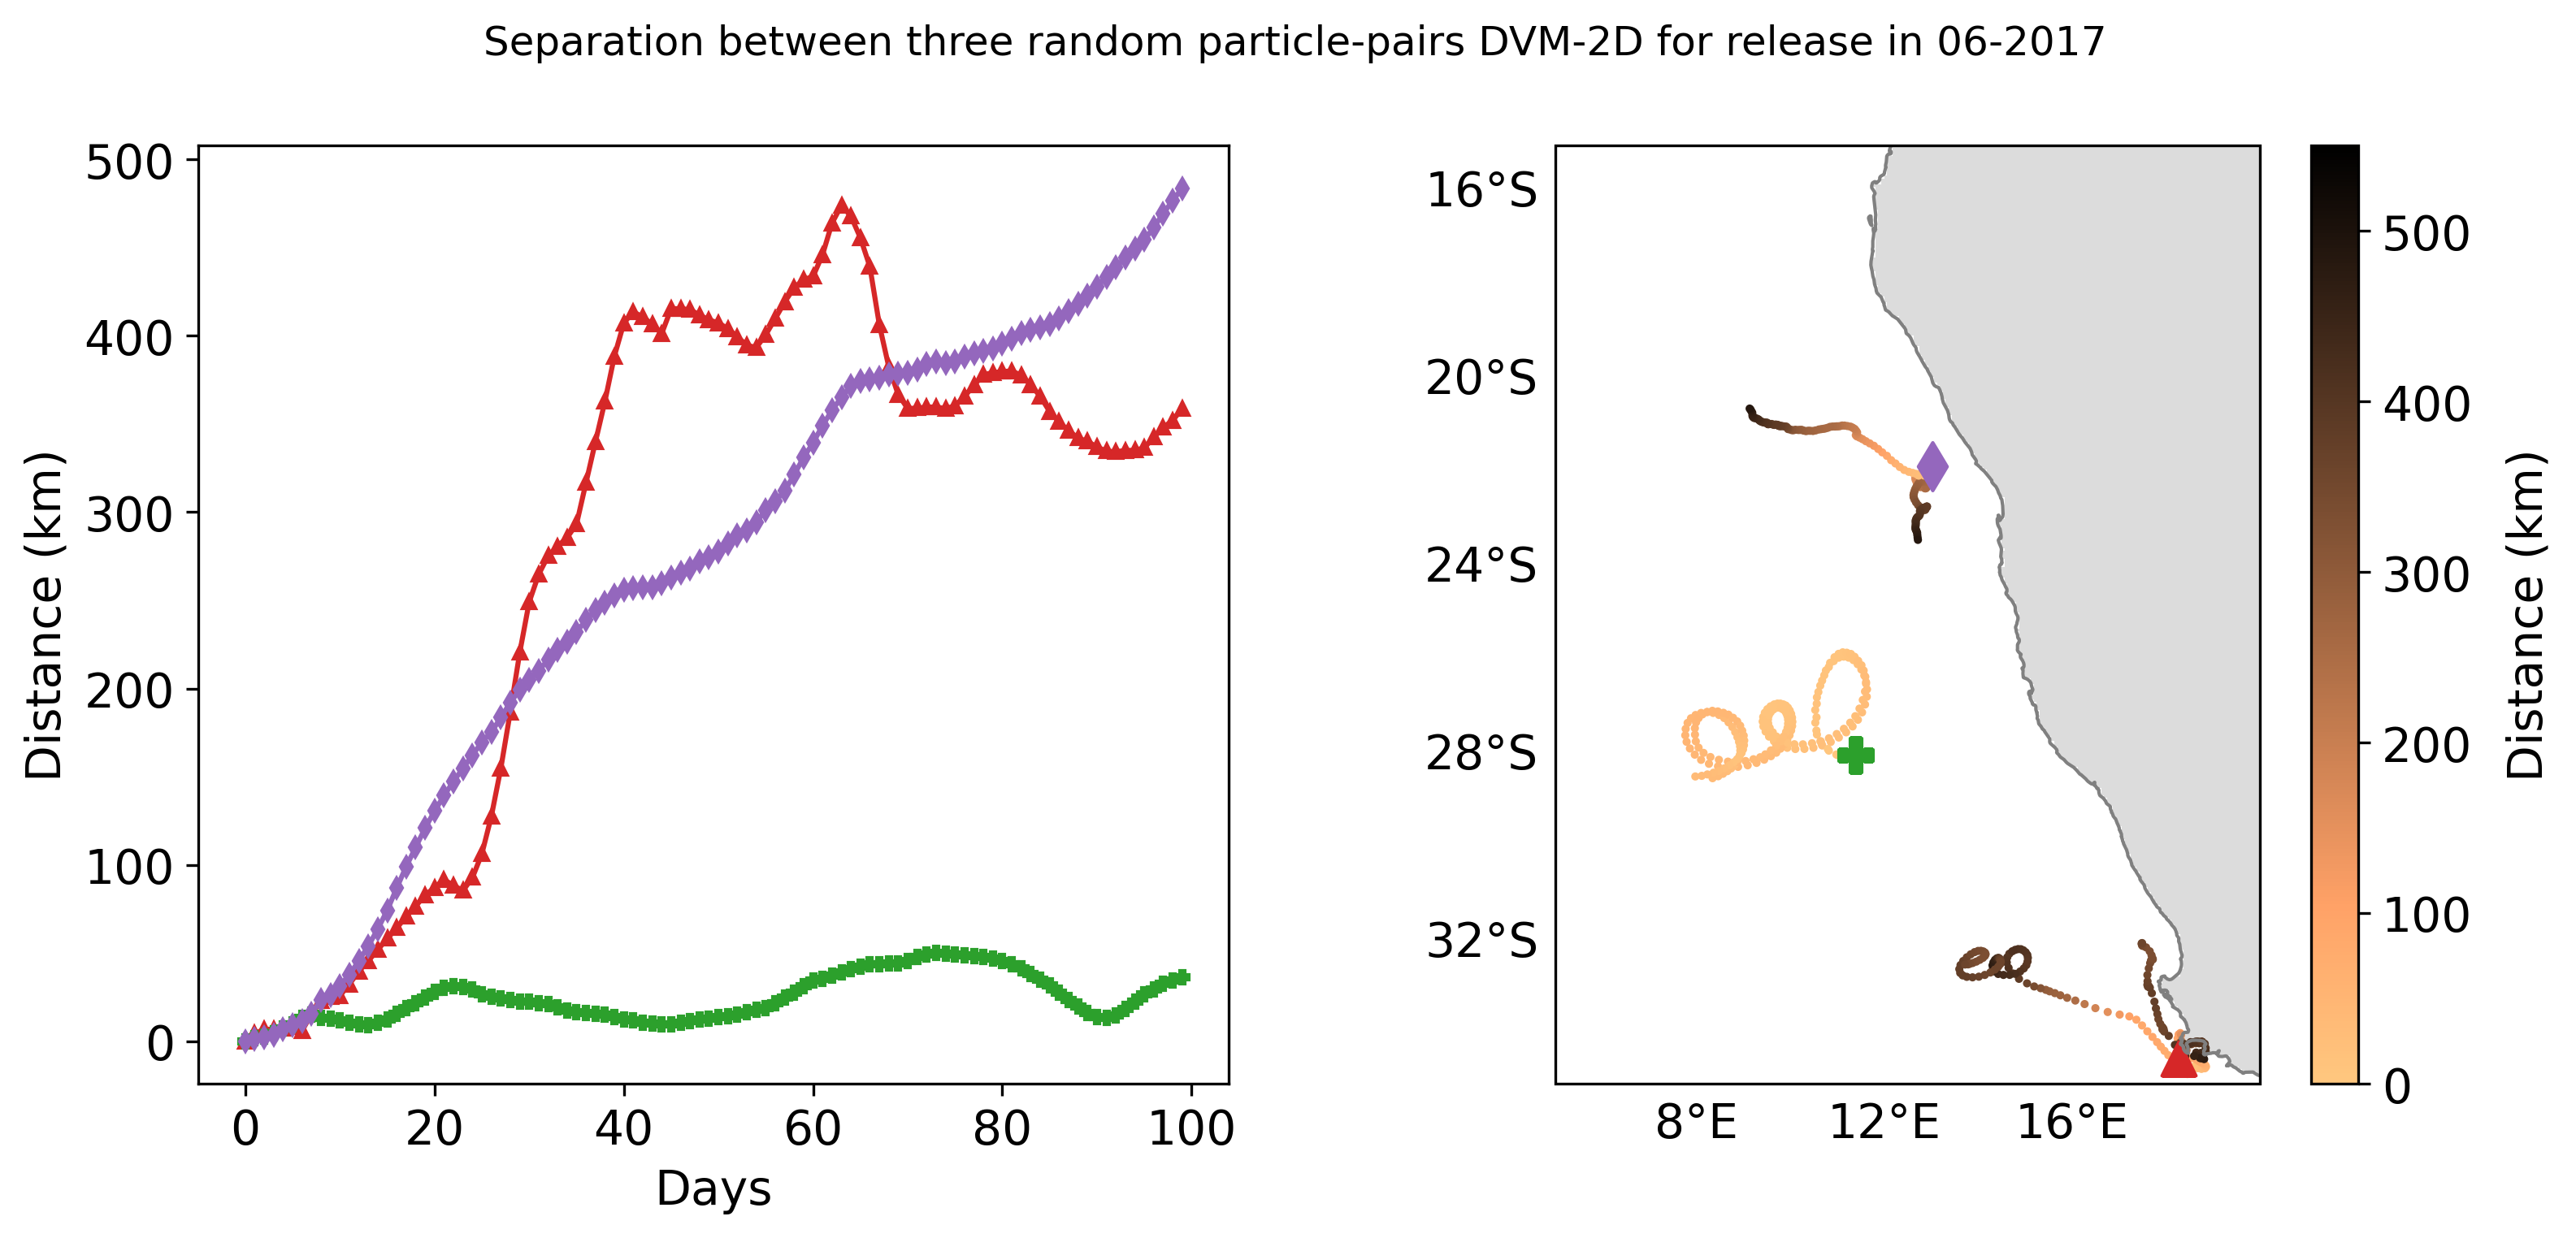

In [30]:
# position=np.random.randint(0,104637)
# print("random position:", position)

positions = [5574, 56234, 86902]
markers = ['+', 'd', 'x']
dpi = 300
custom_size, ticks_size = 14, 14

fig = plt.figure(figsize=(12, 5), dpi=dpi)
fig.suptitle("Separation between three random particle-pairs {0}-{1} for release in {2}-{3}".format(
    type1, type2, str(month_index+1).zfill(2), year))

ax1 = fig.add_subplot(1, 2, 1)
for index, p in enumerate(positions):
    ax1.plot(dist[p, :, month_index], label=p, markersize=4, linewidth=None,
             color=colors2[index], marker=markers2[index])
ax1.tick_params("both", labelsize=custom_size)

ax1.set_ylabel("Distance (km)", fontsize=custom_size)
ax1.set_xlabel("Days", fontsize=custom_size)

ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
colormap = colors.ListedColormap(['gainsboro', 'white'])
gl = ax2.gridlines(draw_labels=True)
x_ticks = np.arange(0, 20, 4)
y_ticks = np.arange(-36, -14, 4)
gl.xlines = False
gl.xlocator = mticker.FixedLocator(x_ticks)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = False
gl.ylocator = mticker.FixedLocator(y_ticks)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': ticks_size, 'color': 'k'}
gl.ylabel_style = {'size': ticks_size, 'color': 'k'}
ax2.tick_params("both", labelsize=custom_size)
ax2.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax2.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750,
               1499:], mask_land[0, 0, 1250:1750, 1500:], cmap=colormap)


# ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
for index, p in enumerate(positions):
    distance = dist[p, :, month_index]
    im = ax2.scatter(ds1.lon[p, :100], ds1.lat[p, :100],
                     c=distance, cmap='copper_r', vmin=0, vmax=550, s=2)
    ax2.scatter(ds2.lon[p, :100], ds2.lat[p, :100],
                c=distance, cmap='copper_r', vmin=0, vmax=550, s=2)
    ax2.scatter(ds1.lon[p, 0], ds1.lat[p, 0], marker=markers2[index],
                s=100, color=colors2[index])

ax2.set_xlim(5, max_lon)
ax2.set_ylim(min_lat, max_lat)
# asp = np.abs(np.diff(ax1.get_xlim())[0] / np.diff(ax1.get_ylim())[0])
# ax2.set_aspect(asp)

cbar = fig.colorbar(im, ax=ax2, orientation='vertical')
cbar.set_label(label='Distance (km)', size=custom_size, labelpad=10)
cbar.ax.tick_params(labelsize=custom_size)

plt.savefig(home_folder + "outputs/Figures/" +
            "Eg_DVMII-2D_Pair_separations_{0}-2017.jpeg".format(str(month_index+1).zfill(2)))

# 10782, 36844

Select one month and see how separation varies for a month:

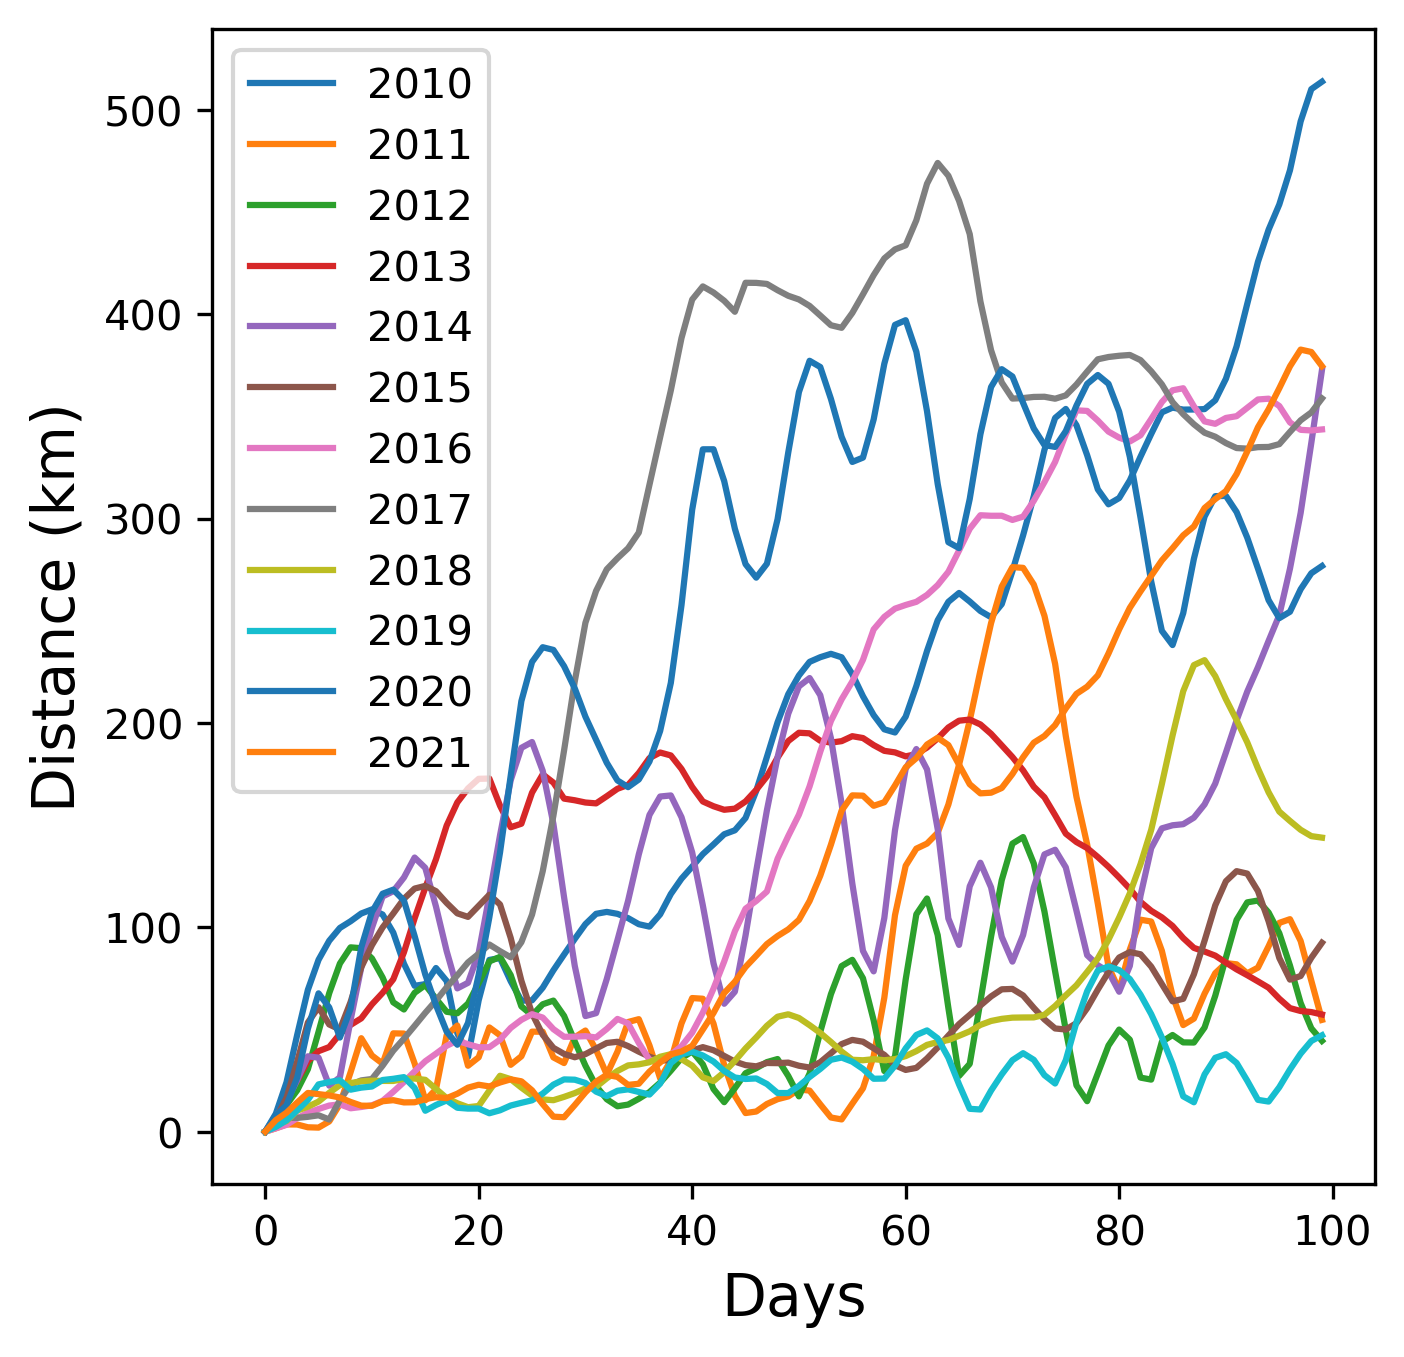

In [36]:
fig = plt.figure(figsize=(5,5), dpi=dpi)
ax=plt.axes()
for y in range(2010,2022):
    dist_temp= np.load(home_folder + "outputs/Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(type1, type2, y, threshold_dist))
    ax.plot(dist_temp[positions[0],:,month_index], label= y)
ax.set_ylabel("Distance (km)", fontsize=custom_size)
ax.set_xlabel("Days", fontsize=custom_size)
plt.legend()

plt.savefig(home_folder + "outputs/Figures/" +
            "Eg_DVMII-2D_Pair_separations_{0}_allYears_id_{1}.jpeg".format(str(month_index+1).zfill(2), positions[0]))


Final separation distance after 100 days for a given simulation:

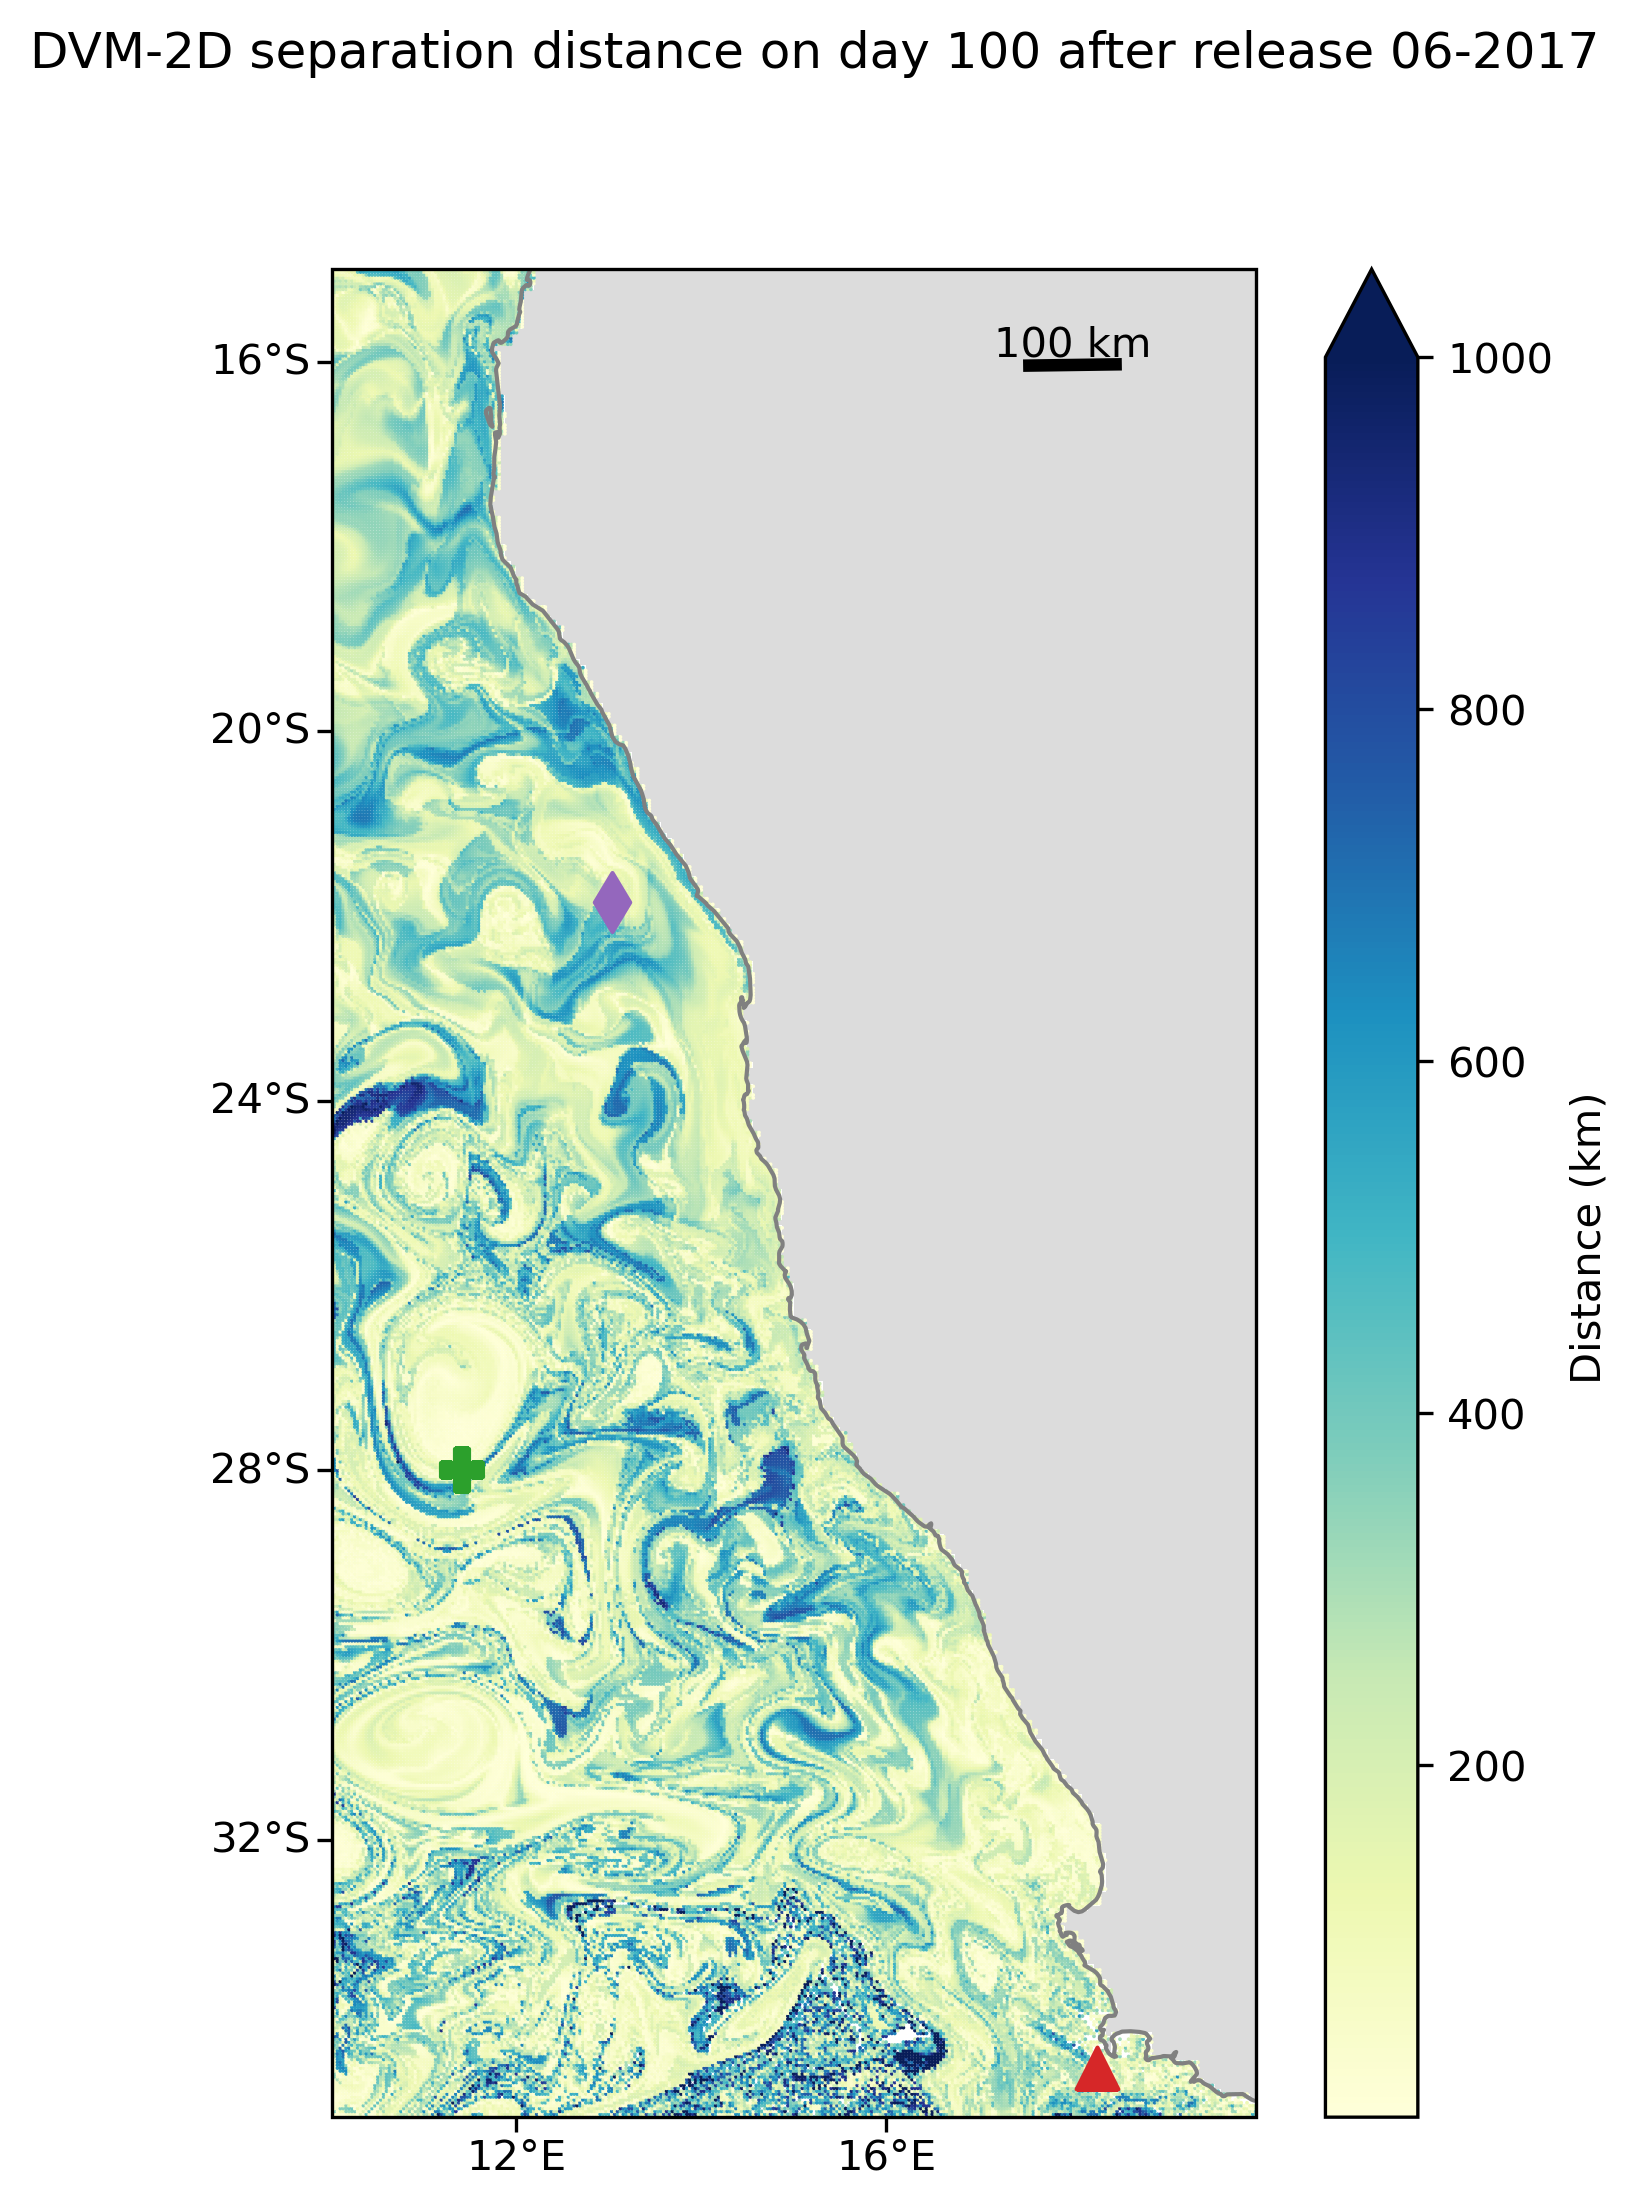

In [29]:
scatter_size = 0.8
days_index=99
input_array = dist[:,-1,month_index]
pre_text='{0}-{1} separation distance on day {2} after release {3}-{4}'.format(type1, type2, days_index+1,str(month_index+1).zfill(2),year)

custom_size=10
ticks_size=10
fig = plt.figure(figsize=(6,8), dpi=dpi)
fig.suptitle(pre_text)
ax = plt.axes(projection=ccrs.PlateCarree())
x_ticks=np.arange(12,20,4)
y_ticks=np.arange(-36,-14,4)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.xlocator = mticker.FixedLocator(x_ticks)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = False
gl.ylocator = mticker.FixedLocator(y_ticks)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': ticks_size, 'color': 'k'}
gl.ylabel_style = {'size': ticks_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.tick_params(axis='both',labelbottom=False, labeltop=False, labelleft=False, labelright=False, labelsize=custom_size)
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')

scatter=ax.scatter(ds1['lon'][:, 0], ds1['lat'][:, 0], c= input_array, s=scatter_size, cmap=cm.YlGnBu, marker='o',edgecolors='none',vmin=0.0001, vmax=1000)
cbar=fig.colorbar(scatter, ax=ax, extend='max')
cbar.set_label(label='Distance (km)', size=custom_size)
cbar.ax.tick_params(labelsize=custom_size)
for index, p in enumerate(positions):   
    ax.scatter(ds1.lon[p,0],ds1.lat[p,0],s=100, color=colors2[index], marker=markers2[index])
scale_bar(ax, 100, location=(0.8, 0.95))

plt.savefig(home_folder + "outputs/Figures/" + "Eg_DVMII-2D_Final_separation_distance_{0}-2017.jpeg".format(str(month_index+1).zfill(2)))

In [46]:
min(input_array), max(input_array)

(0.0, 1712.2125258943358)

In [ ]:
max(dist[:,-1,month_index])

1867.2431430944314

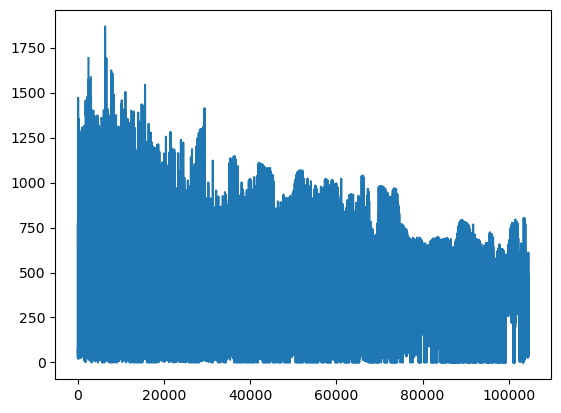

In [ ]:
plt.plot(dist[:,-1,month_index])

plot PDF of final separation distance between particles at the end of 100 days

In [ ]:
years=np.arange(2010,2022)
p_total = 104636    #total number of particles per simulation
t_days=100  #length of simulation in days
threshold_dist = 100    # km-  mesoscale

dvm_types=['DVM_s', 'DVM', 'DVM_d']
compare_modes=['2D', '3D', 'sinking']
dvm_type_labels=['DVM I','DVM II', 'DVM III']


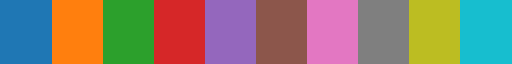

In [ ]:
dpi = 300
# color = cm.YlGnBu #
color = cm.magma_r
scatter_size = .3

spring_ind = [8, 9, 10]
summer_ind = [11, 0, 1]
autumn_ind = [2, 3, 4]
winter_ind = [5, 6, 7]


In [ ]:
# function to compute the PDF of distances provided in the array- using bins upto 8000 km 
distance_bins=np.arange(0,8001,25)
bin_centers= (distance_bins[:-1] + distance_bins[1:]) / 2
def compute_distance_pdf(array):
    count, _ = np.histogram(array, bins=distance_bins, range=(0,10000))  
    pdf = count/np.sum(count)  # computation discards particles that were deleted before crossing the threshold distance. very minor
    # cdf = np.cumsum(pdf)
    return pdf


def plot_mean_std_dist(ax, arr, l, c):
    sigma = 1
    mean = np.nanmean(arr, axis=0)
    std = np.nanstd(arr, axis=0)
    ax.plot(bin_centers, mean, label=l, color=c)
    ax.fill_between(bin_centers, mean - sigma*std, mean + sigma*std, alpha=0.2)

In [ ]:
len(distance_bins)

321

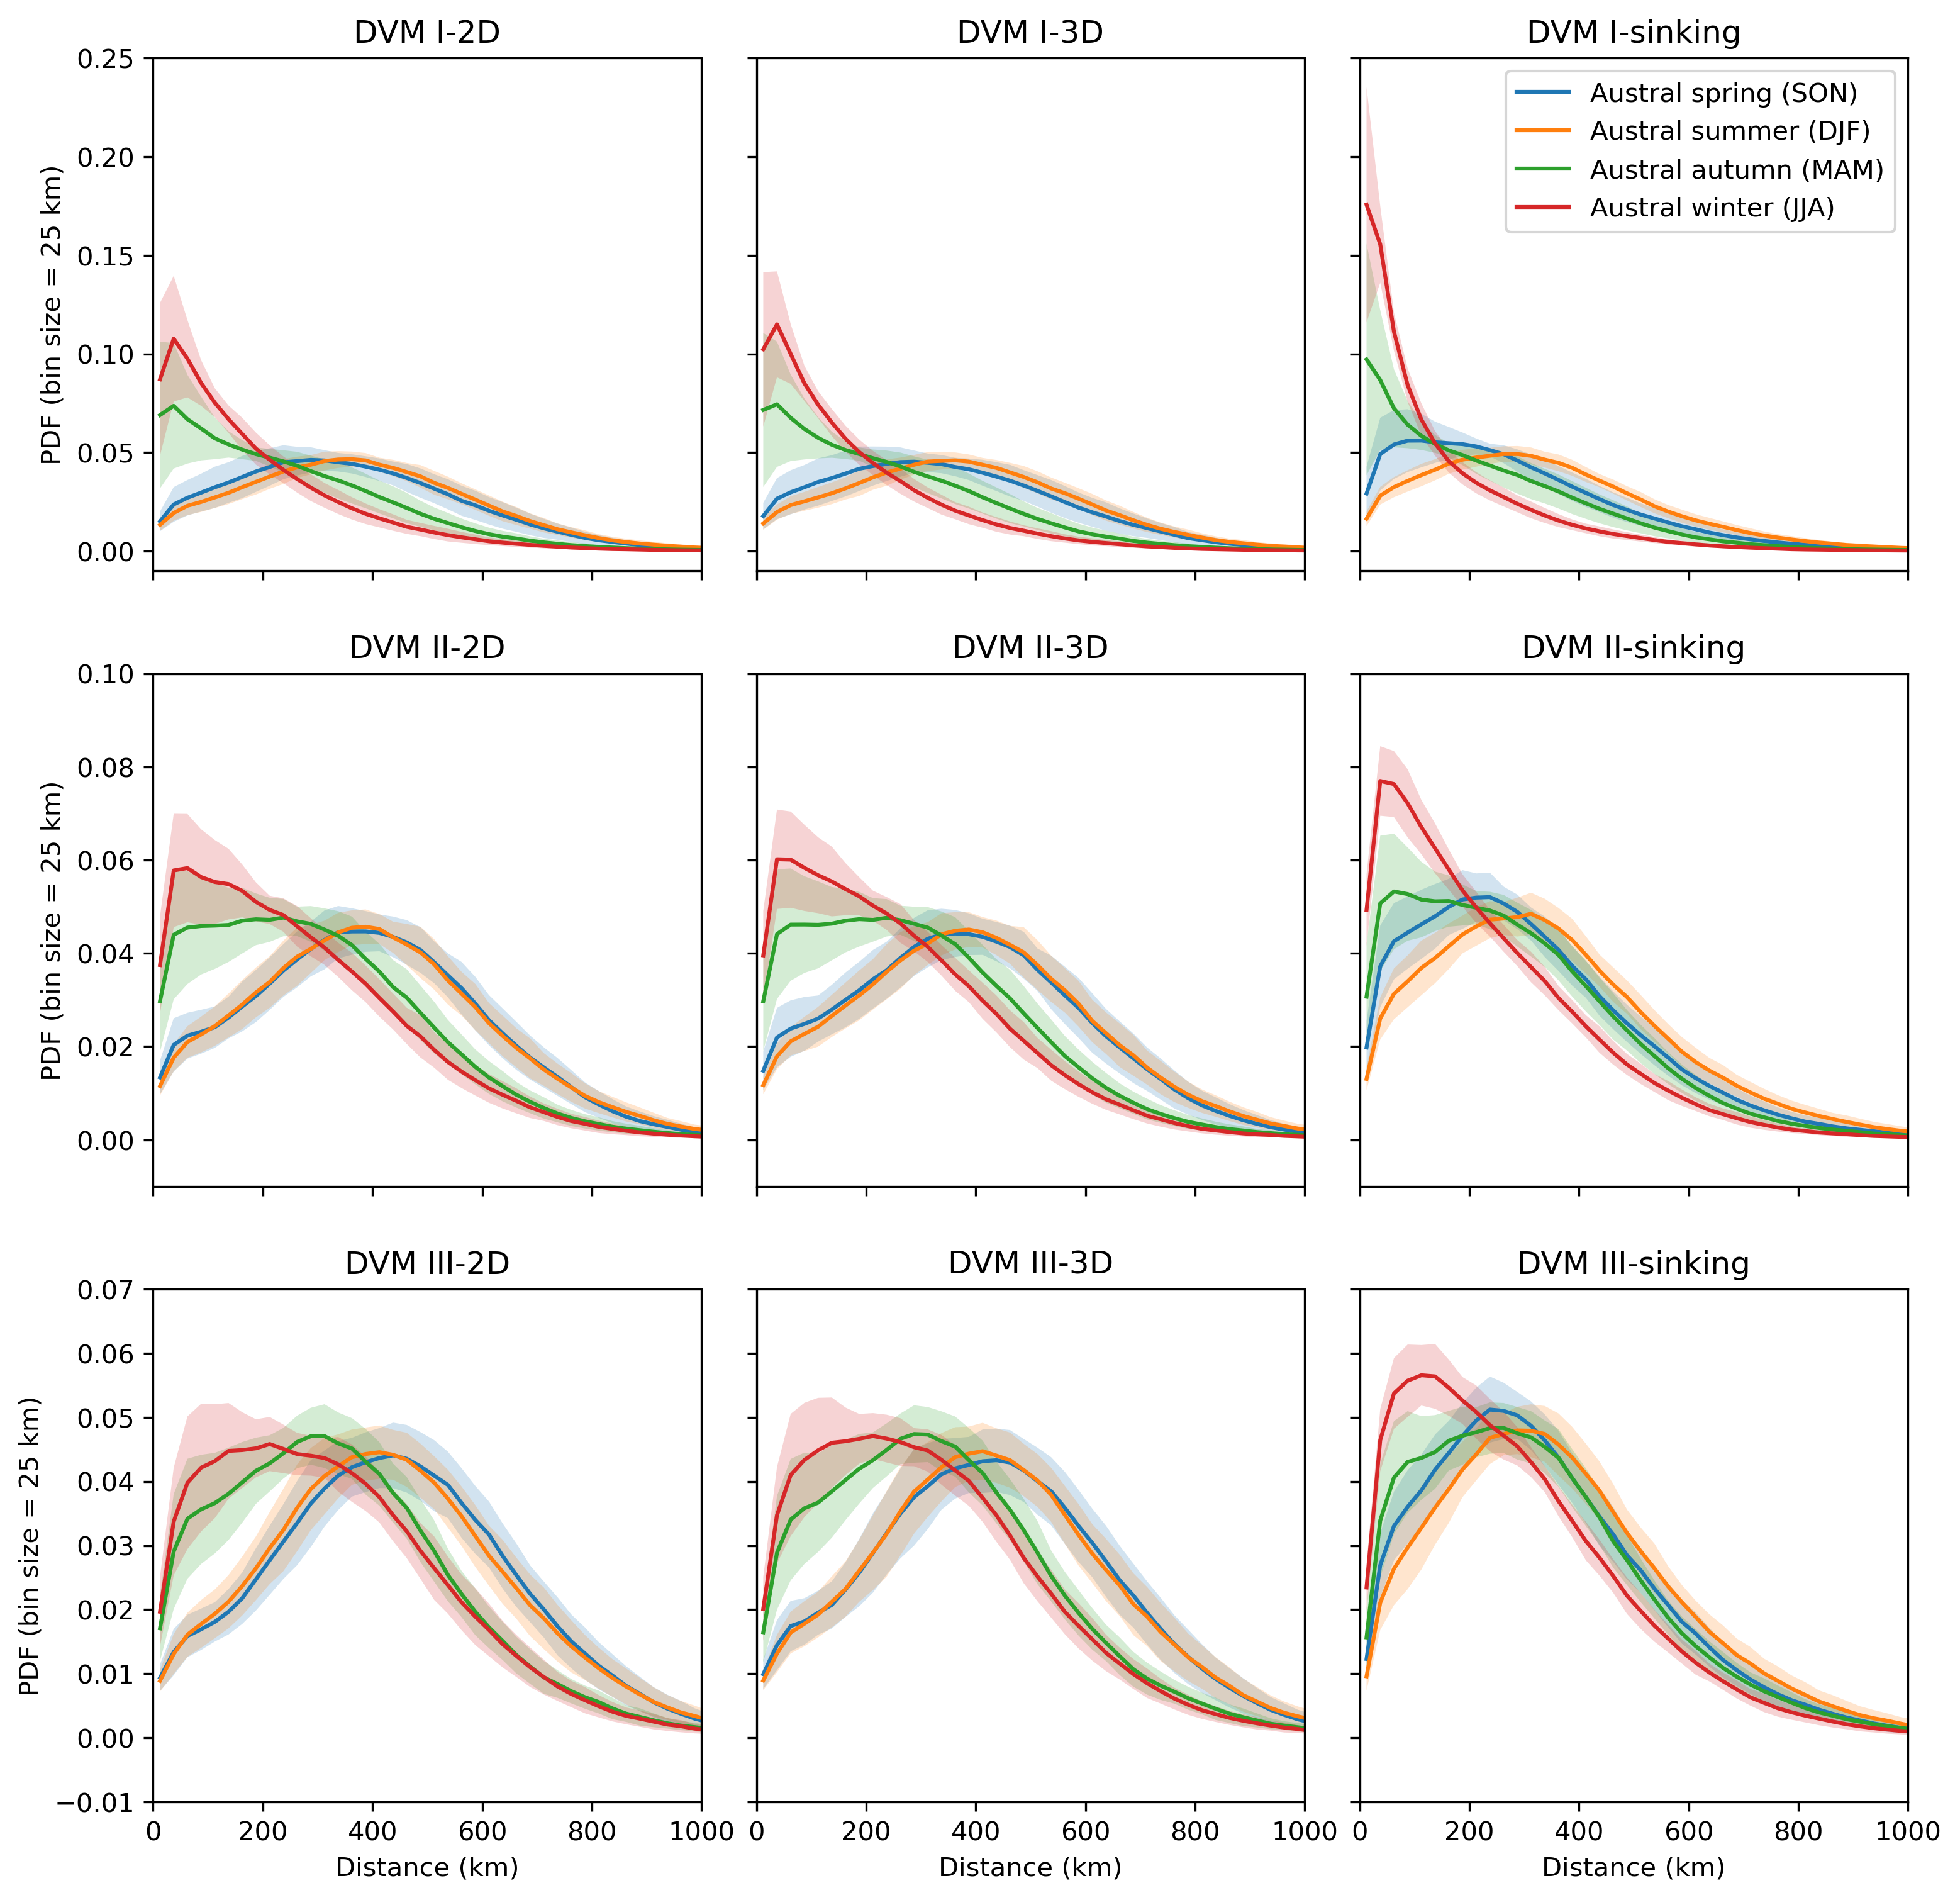

In [ ]:
spring_dist = np.zeros((len(years)*3, len(distance_bins)-1))
summer_dist = np.zeros(spring_dist.shape)
autumn_dist = np.zeros(spring_dist.shape)
winter_dist = np.zeros(spring_dist.shape)

fig, axs = plt.subplots(nrows=len(dvm_types), ncols=3, sharex=True, sharey='row', figsize=(12,12), dpi=dpi)
for i, dvm_mode in enumerate(dvm_types):
    for j,mode in enumerate(compare_modes):
        for index, year in enumerate(years):
            dist_data = np.load(home_folder+"outputs/Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(dvm_mode, mode, year, threshold_dist))
            spring_dist[index*3:index*3+3, :] = np.array([compute_distance_pdf(dist_data[:, -1, ind]) for ind in spring_ind])
            summer_dist[index*3:index*3+3, :] = np.array([compute_distance_pdf(dist_data[:, -1, ind]) for ind in summer_ind])
            autumn_dist[index*3:index*3+3, :] = np.array([compute_distance_pdf(dist_data[:, -1, ind]) for ind in autumn_ind])
            winter_dist[index*3:index*3+3, :] = np.array([compute_distance_pdf(dist_data[:, -1, ind]) for ind in winter_ind])
            
        plot_mean_std_dist(axs[i, j], spring_dist, "Austral spring (SON)",new_cmap(0))
        plot_mean_std_dist(axs[i, j], summer_dist, "Austral summer (DJF)",new_cmap(1))
        plot_mean_std_dist(axs[i, j], autumn_dist, "Austral autumn (MAM)",new_cmap(2))
        plot_mean_std_dist(axs[i, j], winter_dist, "Austral winter (JJA)",new_cmap(3)) 
        axs[i, j].set_title(str(dvm_type_labels[i]+'-'+mode))

    axs[i, 0].set_ylabel("PDF (bin size = 25 km)")
    
axs[2, 0].set_xlabel("Distance (km)")
axs[2, 1].set_xlabel("Distance (km)")
axs[2, 2].set_xlabel("Distance (km)")
axs[0, 2].legend(loc="upper right")

axs[0][0].set_ylim(-0.01, 0.25)
axs[1][0].set_ylim(-0.01, 0.1)
axs[2][0].set_ylim(-0.01, 0.07)
axs[0][0].set_xlim(-0.01, 1000)

plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.savefig(home_folder+"outputs/Figures/PDF_final_separation_distance.pdf")


Animation of separation distance over time, plotted at the initial location.

In [ ]:
scatter_size = 0.5
days_index=99
input_array = dist[:,:,month_index]

pre_text='{0}-{1} separation distance at {2} days for release {3}-{4}'.format(type1, type2, days_index+1,str(month_index).zfill(2),year)

custom_size=10
fig = plt.figure(figsize=(6,8), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(10, 20)
ax.set_ylim(-35, -15)
output_dt = timedelta(days=1)
time_range = np.arange(np.nanmin(ds1['time'].values),
                       np.nanmax(ds1['time'].values) + np.timedelta64(output_dt),
                       output_dt) 
color=cm.Blues
norm = colors.Normalize(vmin=0.0001, vmax=1000)
scatter=ax.scatter(ds1['lon'][:, 0], ds1['lat'][:, 0], c= input_array[:,0], s=1, cmap=color,norm=norm, marker='o',edgecolors='none')
cbar=fig.colorbar(scatter, ax=ax, label='Distance (km)', extend='max')
t = np.datetime_as_string(time_range[0], unit='m')
title = ax.set_title(pre_text + t)

def animate(i):
    t = np.datetime_as_string(time_range[i], unit='m')
    title.set_text(pre_text + t)
    scatter.set_color(color(norm(input_array[:,i])))
    

size = t_days
anim = FuncAnimation(fig, animate, frames=size, interval=200)
anim.save(home_folder + 'outputs/animations/sep_distances_time_{0}_{1}_{3}_{4}.mp4'.format(type1,type2, str(month_index).zfill(2), year))

# takes 13 mins for highest resolution
